Collect dataframes from all participants and analyse

Importiert unterstützende Libraries in das Jupyter Notebook.

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

Legt fest von wo die Dataframes bezogen werden sollen - legt die Arbeitsumgebung fest.

In [2]:
in_directory = './dataframes/'

Zeigt Informationen über den Unterordner 'Dataframes' an. Am Wichtigsten ist dabei für uns, ob alle Dataframes vorhanden sind.

In [3]:
!dir .\dataframes\

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: F6A3-E2E2

 Verzeichnis von C:\Users\Jannis\SeminarSprechstile\dataframes

13.07.2021  14:39    <DIR>          .
13.07.2021  14:39    <DIR>          ..
29.06.2021  13:04            14.390 anghelescu_df.pkl
29.06.2021  13:39            17.704 burkhardt_df.pkl
06.07.2021  12:32            13.674 conle_df.pkl
29.06.2021  13:28            13.046 df_haubenreiser.pkl
29.06.2021  13:46            13.836 fleschner_df.pkl
12.07.2021  09:58            11.344 junack_df.pkl
12.07.2021  10:05            14.013 mettig_df.pkl
29.06.2021  13:05            12.461 mueller_df.pkl
29.06.2021  13:05            15.588 nellesen_df.pkl
06.07.2021  13:38            12.992 puder_df.pkl
29.06.2021  13:28            16.095 wannenmacher_df.pkl
29.06.2021  13:05            14.011 wegner_df.pkl
29.06.2021  13:04            13.417 wendel_df.pkl
              13 Datei(en),        182.571 Bytes
               2 Verzeichnis(se), 309.247.442.944 Bytes fre

Diese Funktion überprüft, ob die Pickle-Datei 'all_participants_data' existiert. Falls nicht werden alle Dateien mit der pickle(.pkl)-Endung im gewählten Verzeichnis bzw. gewählten Direktion zusammengefügt zu der 'all_participants_data.pkl'. Falls diese Datei bereits vorhanden ist, wird sie einfach gelesen, sodass mit ihr im weiteren Verlauf gearbeitet werden kann (if not / else).

In [4]:
if not os.path.isfile('all_participants_data.pkl'):
    df = pd.DataFrame()
    for file in glob.glob(in_directory+'*.pkl'):
        print(file)
        df_tmp = pd.read_pickle(file)
        df = df.append(df_tmp)
    df.to_pickle('all_participants_data.pkl')
else:
    df = pd.read_pickle('all_participants_data.pkl')

Gibt Zeilen- und Spaltenanzahl der gelesenen Datei aus.

In [5]:
df.shape

(547, 35)

Zeigt die ersten fünf Zeilen der eingelesenen Datei an. Die Zahl in Klammern variiert die Zeilenanzahl.

In [6]:
df.head()

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,NaN,NaN
Angehelescu_16_seg_00000001.wav,4.0,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,0.012157,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,NaN,NaN
Angehelescu_16_seg_00000002.wav,4.0,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,0.008597,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,NaN,NaN
Angehelescu_16_seg_00000003.wav,4.0,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,0.007982,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,NaN,NaN
Angehelescu_16_seg_00000004.wav,3.0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,0.007420,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,NaN,NaN


Gibt die 'uniquen' Werte der Speaker aus. In diesem Fall dann deren Namen. Hierbei handelt es sich um die Kurzschreibweise. Der eigentliche Befehl wäre: df['speaker'].unique()

In [7]:
df.speaker.unique()

array(['irina', 'felix', 'lena', 'luise', 'saskia', 'lea', 'alicia',
       'nina', 'jannis', 'Carolin-Antonia', 'sophie', 'lisa', 'tobias'],
      dtype=object)

Zählt die Häufigkeit der unterschiedlichen Valenzwerte aller Sprecher und plottet diese als Histogramm. Da die Werte sich hauptsächlich in der Mitte zentrieren, handelt es sich hierbei eher um weniger interessante Daten.

<AxesSubplot:>

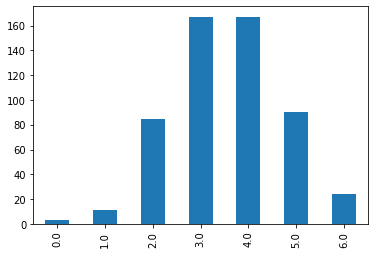

In [8]:
df.valence.value_counts().sort_index().plot(kind='bar')

Plottet die Daten aller Sprecher für jeden Wert als Boxplot. Dabei ist die Grundfrequenz ('meanf0Hz') auf der y-Achse und die Valenz auf der X-Achse. Hier kann tatsächlich ein enormer Unterschied erkannt werden. Während Eine Valenz von 0 zwischen 160-180 Hz Grundfrequenz liegt und auch eine Valenz von 1 nicht über 200 Hz Grundfrequenz liegt, kann man bei einer Valenz von 6 schon eine Grundfrequenz von ca. 220 Hz beobachten.

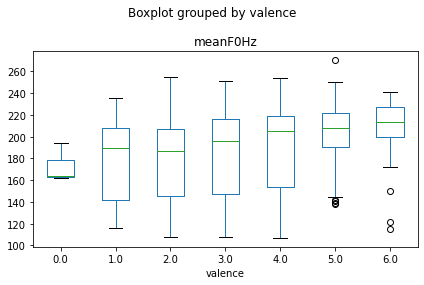

In [9]:
df.boxplot(by='valence',  column ='meanF0Hz', grid = False)
plt.tight_layout()

Plottet die Werte aller Sprecher als Boxplot. Diesmal sind die Werte auf der X-Achse nach dem Geschlecht sortiert und auf der Y-Achse wieder nach der Grundfrequenz ('meanF0Hz'). Durch die geringe Anzahl an männlichen Teilnehmern dieses Kurses muss jedoch der männliche Boxplot etwas vorsichtig betrachtet werden auch wenn die Ergebnisse natürlich logisch sind, wenn man  davon ausgeht, dass die Grundfrequenz der männlichen Teilnehmer deutlich unter der Grundfrequenz der weiblichen Teilnehmer liegt.

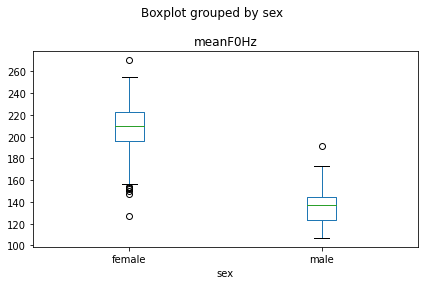

In [10]:
df.boxplot(by='sex',  column ='meanF0Hz', grid = False)
plt.tight_layout()

Gibt den Dataframe im "whitegrid"-Stil mit der Valenz auf der X-Achse als Violinplot aus.

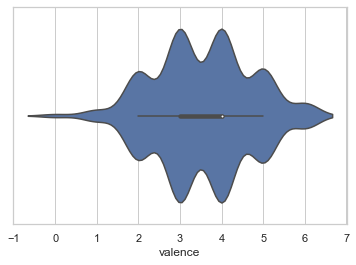

In [11]:
sns.set_theme(style='whitegrid')
ax = sns.violinplot(x=df.valence)

In [12]:
df.head()

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,NaN,NaN
Angehelescu_16_seg_00000001.wav,4.0,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,0.012157,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,NaN,NaN
Angehelescu_16_seg_00000002.wav,4.0,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,0.008597,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,NaN,NaN
Angehelescu_16_seg_00000003.wav,4.0,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,0.007982,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,NaN,NaN
Angehelescu_16_seg_00000004.wav,3.0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,0.007420,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,NaN,NaN


Überprüft ob irgendwelche Werte fehlen bzw. ob irgendwo ein NaN ausgegeben wird.

In [13]:
df.isnull().values.any()

True

Soll überprüfen bei welchem Sprecher die Ausgabe "Check for NaN" - "True" ist. Also auf deutsch: Bei welchem Sprecher fehlen bestimmte Werte bzw. werden als 'NaN' ausgegeben.

In [14]:
check_for_nan = df['speaker'].isnull()
print (check_for_nan) 

file
Angehelescu_16_seg_00000000.wav    False
Angehelescu_16_seg_00000001.wav    False
Angehelescu_16_seg_00000002.wav    False
Angehelescu_16_seg_00000003.wav    False
Angehelescu_16_seg_00000004.wav    False
                                   ...  
Wendel_16_seg_00000007.wav         False
Wendel_16_seg_00000009.wav         False
Wendel_16_seg_00000026.wav         False
Wendel_16_seg_00000036.wav         False
Wendel_16_seg_00000037.wav         False
Name: speaker, Length: 547, dtype: bool


Ersetzt die NaN-Werte mit den Mittelwerten, sodass bei zukünftigen Berechnungen keine Fehler auftreten können, welche durch fehlende Werte / NaNs hervorgerufen werden. Schlussendlich wird eine Pickle-Datei ausgegeben, in welcher die NaN-Werte ersetzt wurden durch die jeweiligen Mittelwerte. Mit dieser Pickle-Datei können wir später besser weiterarbeiten.

In [15]:
# replace NANs with mean value
for i, col in enumerate(df.iloc[:,3:].columns):
    if np.isnan(df[col]).any():
        print()
        print('{} includes {} nan, I\'ll insert mean values'.format(col, df[col].isna().sum()))
        df[col] = df[col].fillna(df[col].mean())
df.to_pickle('all_participants_nonan.pkl')


apq3Shimmer includes 1 nan, I'll insert mean values

apq5Shimmer includes 1 nan, I'll insert mean values

apq11Shimmer includes 3 nan, I'll insert mean values

ddaShimmer includes 1 nan, I'll insert mean values

pF includes 41 nan, I'll insert mean values

fdisp includes 41 nan, I'll insert mean values

avgFormant includes 41 nan, I'll insert mean values

mff includes 41 nan, I'll insert mean values

fitch_vtl includes 41 nan, I'll insert mean values

delta_f includes 41 nan, I'll insert mean values

vtl_delta_f includes 41 nan, I'll insert mean values

JitterPCA includes 101 nan, I'll insert mean values

ShimmerPCA includes 101 nan, I'll insert mean values


Generiert einen sogenannten TSNE-Plot (t-Distributed Stochastic Neighbor Embedding - t-verteilte stochastische Nachbareinbettung), welches eine statistische Methode zur Visualisierung von Daten ist.
Es handelt sich dabei um eine Projektion von all diesen akustischen Werten, welche auf zwei Dimensionen runterskaliert wurden.  Diese werden dann nach der jeweiligen Valenz eingefärbt.  Letztendlich kann keine klare Trennung hierbei beobachtet werden und dementsprechend auch keine klare Aussage getroffen werden. Alle Valenzwerte können eigentlich überall in dem Diagramm vorkommen.


c:\users\jannis\seminarsprechstile\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


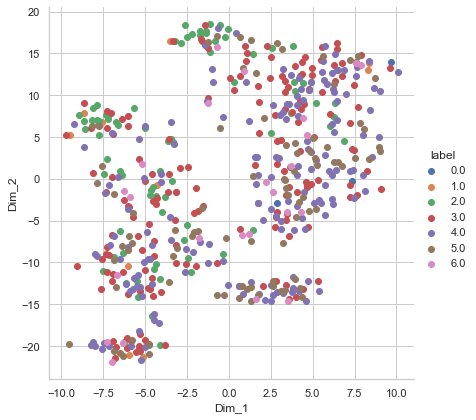

In [16]:
# Plot a TSNE
def plotTsne(feats, labels, perplexity=30, learning_rate=200):
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, learning_rate=learning_rate)
    tsne_data = model.fit_transform(feats)
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne(df.iloc[:,3:], df['valence'], 60, 200)

Discretize the label

Hier wird die pickle-Datei eingelesen, welche wir oben erstellt haben. Diese enthält statt den NaNs die jeweiligen Mittelwerte.

In [17]:
df = pd.read_pickle('all_participants_nonan.pkl')

Mit dieser Funktion wird diskretisiert. Hierbei handelt es sich um eine Numpy-Funktion - 'digitize'. Diese Funktion nimmt zwei Argumente - zum einen 'Werte' und zum Anderen 'Bins' (dt. Behälter). Falls wir nur noch zwei Argumente haben möchten, müssen wir dafür drei eingeben. Einen Unterwert, einen Mittelwert und einen Oberwert.
val_bin soll direkt nach Valenz kommen. Die Spalte wird mit dem Befehl dort eingefügt.
Außerdem bewirkt sie, dass alles mit einer Valenz unter 4 gleich 0 ist (bei val_bin) und alles was gleich bzw. über vier ist, wird zu 1. Dies ist auch eine Vorbereitung dafür, dass wir ein in der grafischen Visualisierung ein logisches Histogramm plotten können. Funfact: Wenn wir statt der 7 eine 6 benutzen, erscheint im Histogramm eine zwei. Der Wert muss also über dem Maximalwert der Valenz von 6 liegen.

In [18]:
# discretzie valence with border between 3 and 4
df.insert(1, 'val_bin', -1)
df['val_bin'] = np.digitize (df.valence.values, [0,4,7])-1

In [19]:
df.head()

,valence,val_bin,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,...,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,JitterPCA,ShimmerPCA
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,1,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,...,3890.653335,0.034499,1128.602727,2189.947411,1724.099350,16.258670,1100.541549,15.901262,-0.009108,-0.003013
Angehelescu_16_seg_00000001.wav,4.0,1,irina,female,5.96,230.974964,39.822558,9.240131,0.024346,0.000106,...,3865.271638,0.197979,1096.403603,2208.987168,1788.838185,15.664861,1099.272751,15.919616,-0.009108,-0.003013
Angehelescu_16_seg_00000002.wav,4.0,1,irina,female,6.96,217.720590,40.656277,11.302664,0.017945,0.000082,...,3863.210498,-0.734963,1124.081020,2132.891562,1672.220935,16.765487,1076.734110,16.252852,-0.009108,-0.003013
Angehelescu_16_seg_00000003.wav,4.0,1,irina,female,6.96,223.013685,40.045658,10.033796,0.016122,0.000072,...,3889.489510,0.230677,1098.321195,2211.255038,1798.267563,15.587988,1100.690985,15.899104,-0.009108,-0.003013
Angehelescu_16_seg_00000004.wav,3.0,0,irina,female,1.66,232.001187,25.032989,14.639509,0.014489,0.000063,...,3878.346306,0.210506,1122.512046,2203.411591,1740.302593,16.106597,1104.395672,15.845770,-0.009108,-0.003013


Plottet den 'val-bin'-Wert als Histogramm. Somit können wir gut unterscheiden zwischen hoher und niedriger Valenz. Der gewählte Wert von vier in Kombination mit den ausgeglichenen Ergebnissen zeigt uns auf, dass wir mit 4 den richtigen Wert gewählt haben um zwischen hoher (1) und niedriger (0) Valenz zu unterscheiden.

<AxesSubplot:>

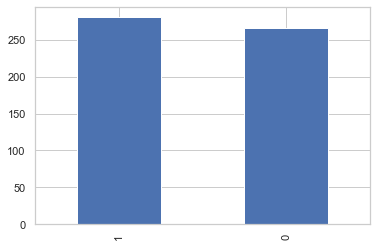

In [20]:
df.val_bin.value_counts().plot(kind ='bar')

Plottet den TSNE (Erklärung s. oben) diesmal mit nur zwei Werten. Das Kategorisieren bzw. Zusammenfassen von Daten kann in der Datenerfassung häufiger beobachtet werden, wenn man bei zu detaillierten Daten nichts erkennen kann. Bei der groben Zusammenfassung kann man meist etwas mehr erkennen. Genauso wie man hier erahnen kann, dass sich etwas mehr der orangenen Partikel im oberen, rechten Drittel befinden, als von den blauen Partikeln.

c:\users\jannis\seminarsprechstile\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


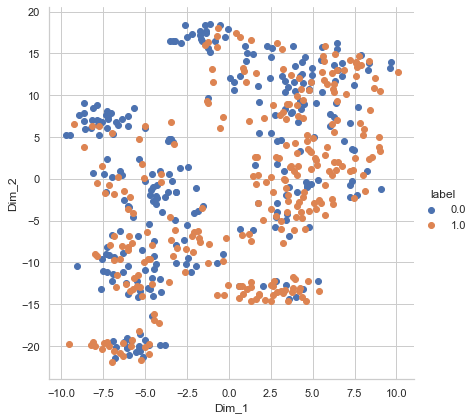

In [21]:
plotTsne(df.iloc[:,4:], df['val_bin'], 60, 200)

Grafische Repräsentationen als zusätzliche Eigenleistung zum Abschluss.

<AxesSubplot:ylabel='val_bin'>

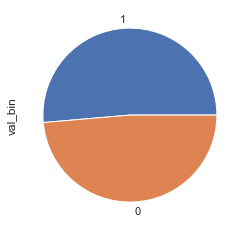

In [28]:
df.val_bin.value_counts().plot(kind ='pie')

<AxesSubplot:xlabel='meanF0Hz', ylabel='val_bin'>

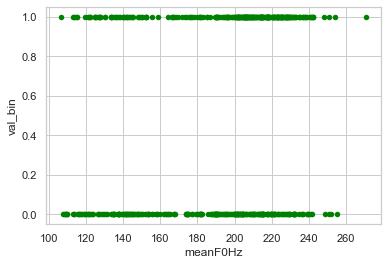

In [33]:
df.plot.scatter(y='val_bin', x='meanF0Hz', c='Green')

<AxesSubplot:>

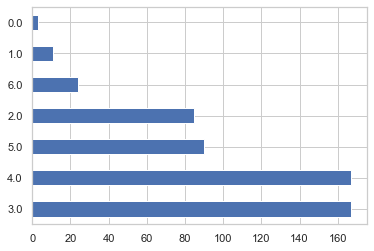

In [32]:
df.valence.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='valence'>

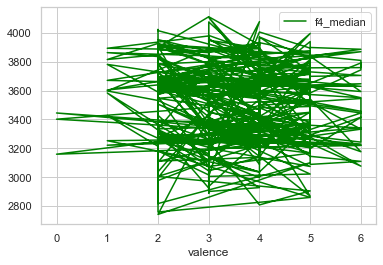

In [49]:
df.plot.line(y='f4_median', x= 'valence', c='green')

<AxesSubplot:xlabel='localabsoluteJitter'>

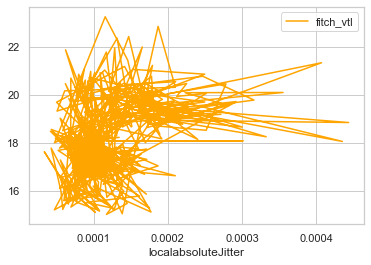

In [50]:
df.plot.line(y='fitch_vtl', x= 'localabsoluteJitter', c='orange')